In [73]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [74]:
tc=pd.read_csv("T.csv")

In [75]:
tc.head()

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,4,5,210,1165
1,13750,23,72937,90,2000,3,4,5,210,1165
2,13950,24,41711,90,2000,3,4,5,210,1165
3,14950,26,48000,90,2000,3,4,5,210,1165
4,13750,30,38500,90,2000,3,4,5,210,1170


In [76]:
df=pd.DataFrame(tc)
df

,Price,Age_08_04,KM,HP,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,4,5,210,1165
1,13750,23,72937,90,2000,3,4,5,210,1165
2,13950,24,41711,90,2000,3,4,5,210,1165
3,14950,26,48000,90,2000,3,4,5,210,1165
4,13750,30,38500,90,2000,3,4,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,4,5,69,1025
1432,10845,72,19000,86,1300,3,4,5,69,1015
1433,8500,71,17016,86,1300,3,4,5,69,1015
1434,7250,70,16916,86,1300,3,4,5,69,1015


In [77]:
df=df.rename(columns={"Age_08_04":"age"})

In [78]:
df=df.rename(columns={"Quarterly_Tax":"qur"})

In [79]:
df.head()

,Price,age,KM,HP,cc,Doors,Cylinders,Gears,qur,Weight
0,13500,23,46986,90,2000,3,4,5,210,1165
1,13750,23,72937,90,2000,3,4,5,210,1165
2,13950,24,41711,90,2000,3,4,5,210,1165
3,14950,26,48000,90,2000,3,4,5,210,1165
4,13750,30,38500,90,2000,3,4,5,210,1170


In [80]:
df.describe()

,Price,age,KM,HP,cc,Doors,Cylinders,Gears,qur,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.0,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000


{'whiskers': [<matplotlib.lines.Line2D at 0xae239f1190>,
 'caps': [<matplotlib.lines.Line2D at 0xae239f18e0>,
 'boxes': [<matplotlib.lines.Line2D at 0xae239f1c10>],
 'medians': [<matplotlib.lines.Line2D at 0xae1e141850>],
 'fliers': [<matplotlib.lines.Line2D at 0xae1e141d30>],
 'means': []}

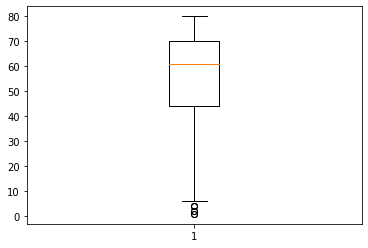

In [81]:
plt.boxplot(df["age"])

{'whiskers': [<matplotlib.lines.Line2D at 0xae1f6416a0>,
 'caps': [<matplotlib.lines.Line2D at 0xae2379e970>,
 'boxes': [<matplotlib.lines.Line2D at 0xae20dcbbb0>],
 'medians': [<matplotlib.lines.Line2D at 0xae2379e2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0xae2379e670>],
 'means': []}

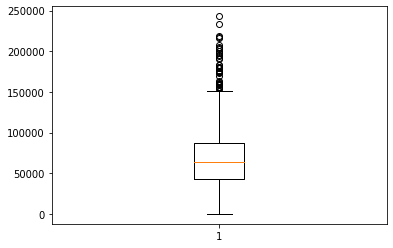

In [82]:
plt.boxplot(df["KM"])

{'whiskers': [<matplotlib.lines.Line2D at 0xae23514e80>,
 'caps': [<matplotlib.lines.Line2D at 0xae235147c0>,
 'boxes': [<matplotlib.lines.Line2D at 0xae235147f0>],
 'medians': [<matplotlib.lines.Line2D at 0xae2389d3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0xae2389d5b0>],
 'means': []}

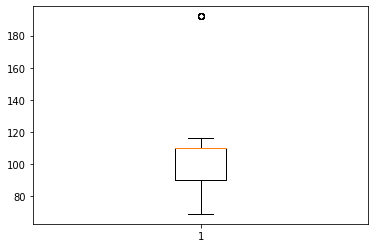

In [83]:
plt.boxplot(df["HP"])

{'whiskers': [<matplotlib.lines.Line2D at 0xae1f71e730>,
 'caps': [<matplotlib.lines.Line2D at 0xae23aa8c10>,
 'boxes': [<matplotlib.lines.Line2D at 0xae1f71e880>],
 'medians': [<matplotlib.lines.Line2D at 0xae1de146d0>],
 'fliers': [<matplotlib.lines.Line2D at 0xae1f850fa0>],
 'means': []}

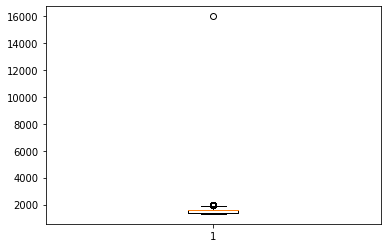

In [84]:
plt.boxplot(df["cc"])

{'whiskers': [<matplotlib.lines.Line2D at 0xae1ddd4f70>,
 'caps': [<matplotlib.lines.Line2D at 0xae20cef340>,
 'boxes': [<matplotlib.lines.Line2D at 0xae1ddd45e0>],
 'medians': [<matplotlib.lines.Line2D at 0xae20cef670>],
 'fliers': [<matplotlib.lines.Line2D at 0xae20cd58e0>],
 'means': []}

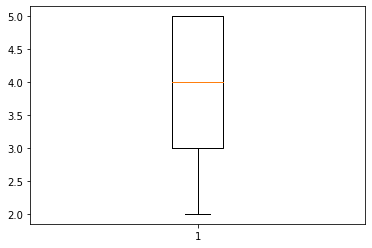

In [85]:
plt.boxplot(df["Doors"])

In [86]:
# Correlation matrix 
df.corr()

,Price,age,KM,HP,cc,Doors,Cylinders,Gears,qur,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,NaN,0.063104,0.219197,0.581198
age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,NaN,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,NaN,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,NaN,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,NaN,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,NaN,-0.160141,0.109363,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,NaN,1.000000,-0.005452,0.020613
qur,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,NaN,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,NaN,0.020613,0.626134,1.000000


In [87]:
import seaborn as sns

Index(['Price', 'age', 'KM', 'HP', 'cc', 'Doors', 'Cylinders', 'Gears', 'qur',
       'Weight'],
      dtype='object')

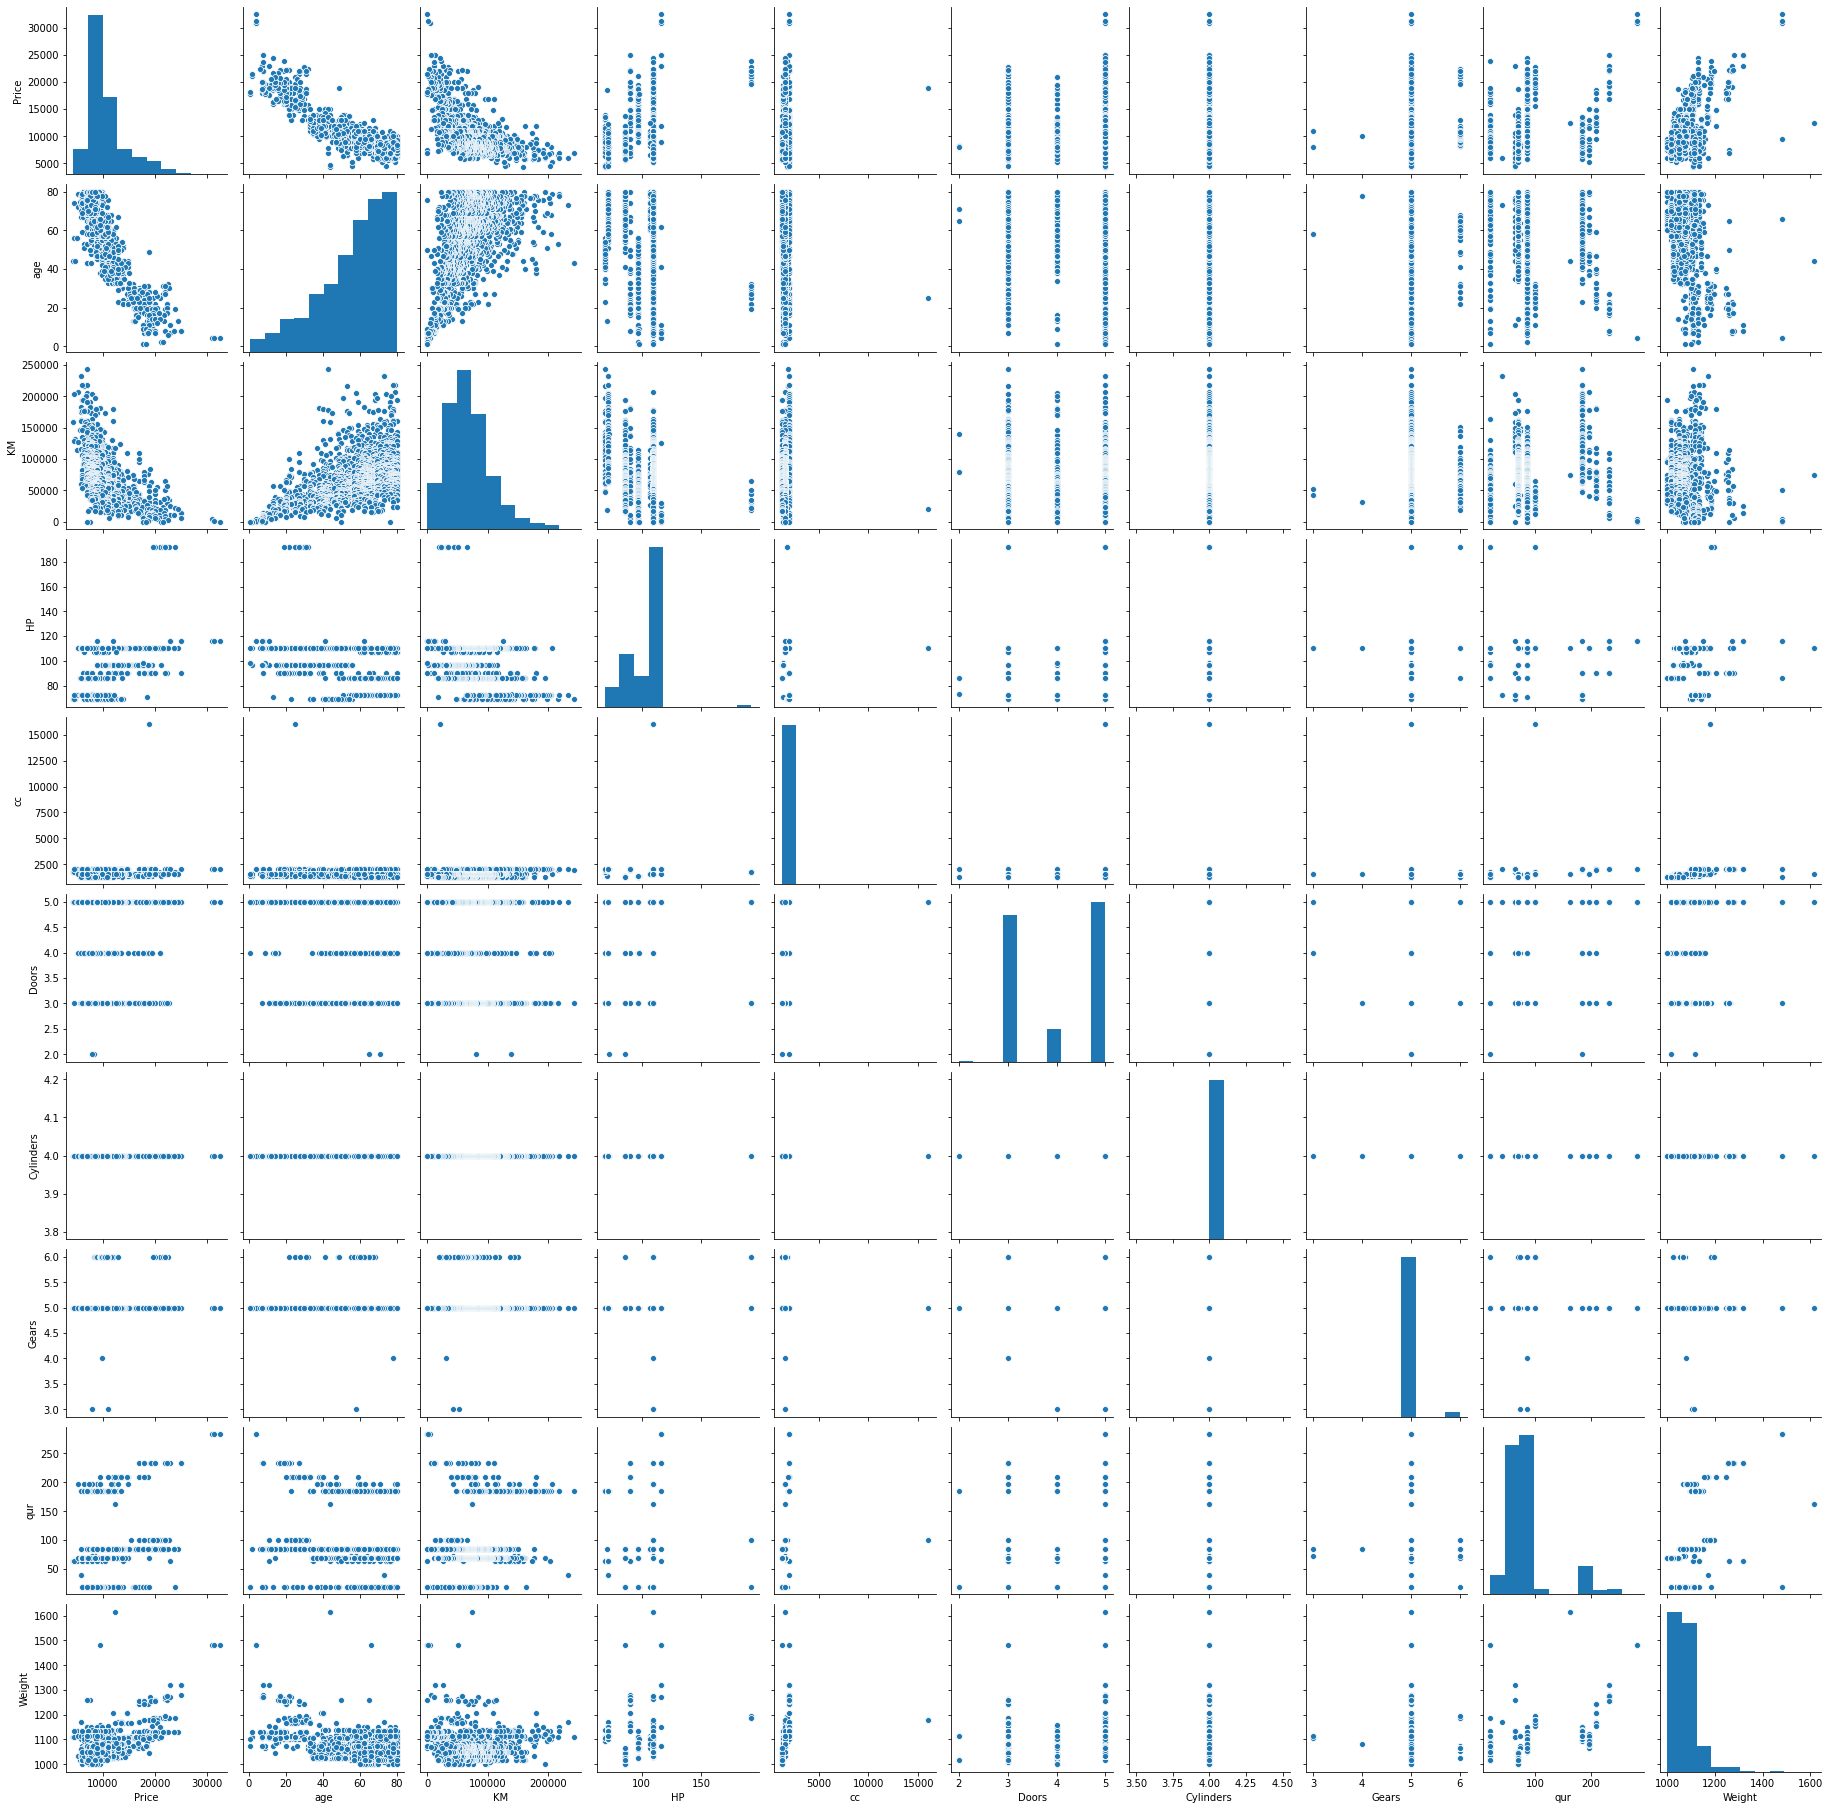

In [88]:
sns.pairplot(df)
df.columns

In [89]:
# To build a model price based on the other variables
import statsmodels.formula.api as smf

In [90]:
#preparing model considering all the variables 
import statsmodels.formula.api as smf # for regression model

In [91]:
# Preparing model                  
ml1 = smf.ols('Price~age+KM+HP+cc+Doors+Gears+qur+Weight',data=df).fit() # regression model


In [92]:
# Getting coefficients of variables               
ml1.params


Intercept   -5573.106358
age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
qur             3.949081
Weight         16.958632
dtype: float64

In [93]:
# Summary
ml1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 25 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:01:55   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
qur            3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
ml_D=smf.ols('Price~Doors',data = df).fit()  
ml_D.summary()
# p-value <0.05 .. It is significant 


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           1.46e-12
Time:                        12:01:57   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
# Preparing model based only on WT
ml_C=smf.ols('Price~cc',data = df).fit()  
ml_C.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           1.55e-06
Time:                        12:01:59   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
# Preparing model based only on WT & VOL
ml_DC=smf.ols('Price~Doors+cc',data = df).fit()  
ml_DC.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Fri, 25 Dec 2020   Prob (F-statistic):           1.15e-15
Time:                        12:02:00   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
cc             0.9597      0.221      4.340      0.000       0.526       1.393
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
rsq_age = smf.ols('age~KM+HP+cc+Doors+Gears+qur+Weight',data=df).fit().rsquared  
vif_age = 1/(1-rsq_age) 

rsq_km = smf.ols('KM~age+HP+cc+Doors+Gears+qur+Weight',data=df).fit().rsquared  
vif_km = 1/(1-rsq_km) 

rsq_hp = smf.ols('HP~KM+age+cc+Doors+Gears+qur+Weight',data=df).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 
rsq_dr = smf.ols('Doors~age+KM+HP+cc+Gears+qur+Weight',data=df).fit().rsquared  
vif_dr = 1/(1-rsq_dr) 
rsq_cc = smf.ols('cc~age+KM+HP+cc+Gears+qur+Weight',data=df).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 
rsq_gr= smf.ols('Gears~age+KM+HP+cc+Doors+qur+Weight',data=df).fit().rsquared  
vif_gr= 1/(1-rsq_gr) 
rsq_qr = smf.ols('qur~age+KM+HP+cc+Doors+Gears+Weight',data=df).fit().rsquared  
vif_qr = 1/(1-rsq_qr) 
rsq_wt = smf.ols('Weight~age+KM+HP+cc+Doors+Gears+qur',data=df).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 
# Storing vif values in a data frame
d1 = {'Variables':['age','KM','HP','Doors','cc','Gears','qur','Weight'],'VF':[vif_age,vif_km,vif_hp,vif_dr,vif_cc,vif_gr,vif_qr,vif_wt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

<ipython-input-97-3dc439bf5a5d>:12: RuntimeWarning: divide by zero encountered in double_scalars
  vif_cc = 1/(1-rsq_cc)


,Variables,VF
0,age,1.884620
1,KM,1.756905
2,HP,1.419422
3,Doors,1.156575
4,cc,inf
5,Gears,1.098723
6,qur,2.311431
7,Weight,2.516420


Residual Analysis¶

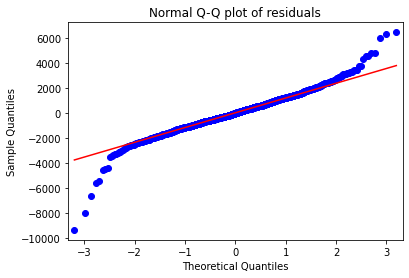

In [98]:
#Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot=sm.qqplot(ml1.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Residual Plot for Homoscedasticity¶

In [99]:
def get_standardized_values(vals):
    return (vals -vals.mean())/vals.std()

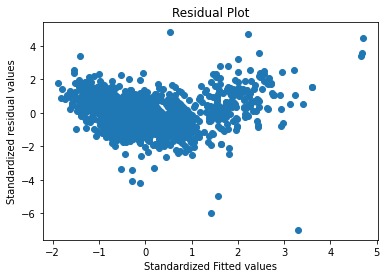

In [100]:
plt.scatter(get_standardized_values(ml1.fittedvalues),
            get_standardized_values(ml1.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

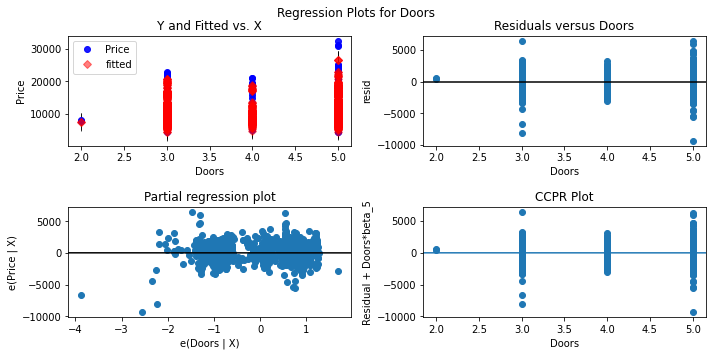

In [101]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(ml1, "Doors", fig=fig)
plt.show()

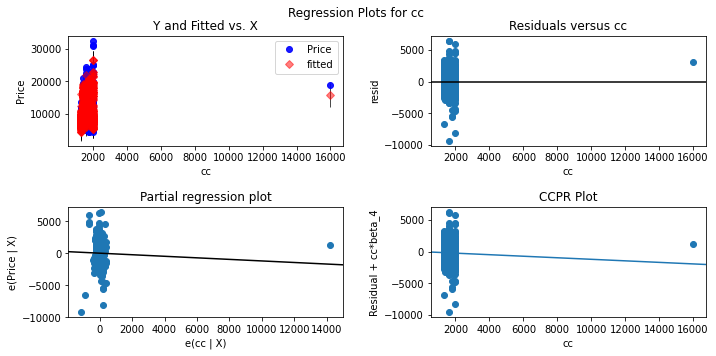

In [102]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(ml1, "cc", fig=fig)
plt.show()

# Model Deletion Diagnostics
# Detecting Influencers/Outliers
# Cook’s Distance

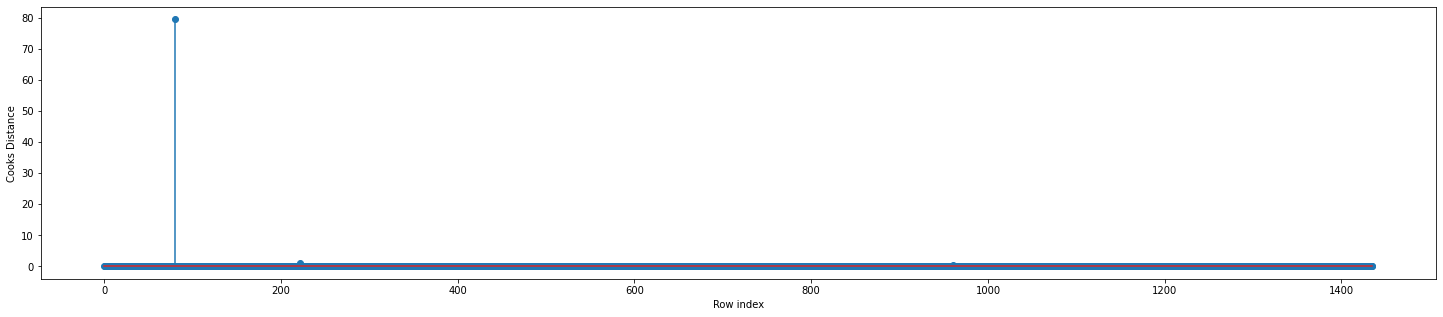

In [103]:
model_influence = ml1.get_influence()
(c, _) = model_influence.cooks_distance
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(25, 5))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [104]:
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

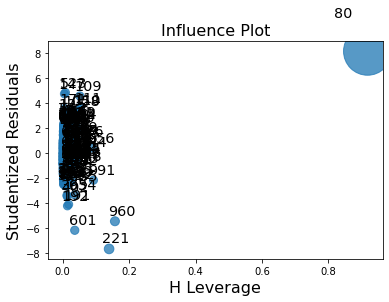

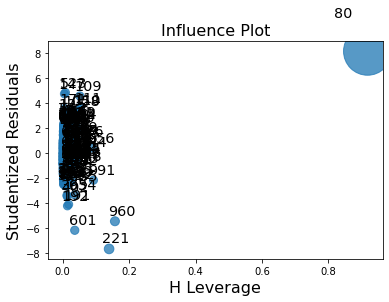

In [107]:
import statsmodels.api as sm
sm.graphics.influence_plot(ml1)

In [108]:
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.02298050139275766

In [110]:
df_new=df.drop(df.index[[80]],axis=0).reset_index()
df_new

,index,Price,age,KM,HP,cc,Doors,Cylinders,Gears,qur,Weight
0,0,13500,23,46986,90,2000,3,4,5,210,1165
1,1,13750,23,72937,90,2000,3,4,5,210,1165
2,2,13950,24,41711,90,2000,3,4,5,210,1165
3,3,14950,26,48000,90,2000,3,4,5,210,1165
4,4,13750,30,38500,90,2000,3,4,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,1431,7500,69,20544,86,1300,3,4,5,69,1025
1431,1432,10845,72,19000,86,1300,3,4,5,69,1015
1432,1433,8500,71,17016,86,1300,3,4,5,69,1015
1433,1434,7250,70,16916,86,1300,3,4,5,69,1015


In [111]:
df_new=df_new.drop(['index'],axis=1)
df_new

,Price,age,KM,HP,cc,Doors,Cylinders,Gears,qur,Weight
0,13500,23,46986,90,2000,3,4,5,210,1165
1,13750,23,72937,90,2000,3,4,5,210,1165
2,13950,24,41711,90,2000,3,4,5,210,1165
3,14950,26,48000,90,2000,3,4,5,210,1165
4,13750,30,38500,90,2000,3,4,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,4,5,69,1025
1431,10845,72,19000,86,1300,3,4,5,69,1015
1432,8500,71,17016,86,1300,3,4,5,69,1015
1433,7250,70,16916,86,1300,3,4,5,69,1015


In [112]:
#Exclude variable "adminstration" and generate R-Squared and AIC values
final_ml1_a= smf.ols('Price~age+KM+HP+Doors+Gears+qur+Weight',data = df_new).fit()
(final_ml1_a.rsquared,final_ml1_a.aic)

(0.8631959819380925, 24751.649416173997)

In [113]:
final_ml1_b= smf.ols('Price~age+KM+HP+cc+Gears+qur+Weight',data = df_new).fit()
(final_ml1_b.rsquared,final_ml1_b.aic)

(0.8693349475698542, 24685.765438793034)

In [114]:
final_ml1_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     1356.
Date:                Fri, 25 Dec 2020   Prob (F-statistic):               0.00
Time:                        12:03:54   Log-Likelihood:                -12335.
No. Observations:                1435   AIC:                         2.469e+04
Df Residuals:                    1427   BIC:                         2.473e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6313.9396   1381.857     -4.569      0.000   -9024.628   -3603.251
age         -120.4577      2.561    -47.031      0.000    -125.482    -115.433
KM            -0.0179      0.001    -14.029      0.000      -0.020      -0.015
HP            39.1593      2.898     13.512      0.000      33.474      44.844
cc            -2.5069      0.306     -8.188      0.000      -3.107      -1.906
Gears        549.7311    189.216      2.905      0.004     178.561     920.902
qur            9.0759      1.424      6.374      0.000       6.283      11.869
Weight        19.9623      1.076     18.547      0.000      17.851      22.074
==============================================================================
Omnibus:                      239.713   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2556.740
Skew:                          -0.425   Prob(JB):                         0.00
Kurtosis:                       9.484   Cond. No.                     3.13e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Comparing above R-Square and AIC values, model 'final_ml1_b' has high R- square and low AIC value hence include variable 'cc' so that multi collinearity problem would be resolved.

In [115]:
model_influence_b = final_ml1_b.get_influence()
(c_M, _) = model_influence_b.cooks_distance

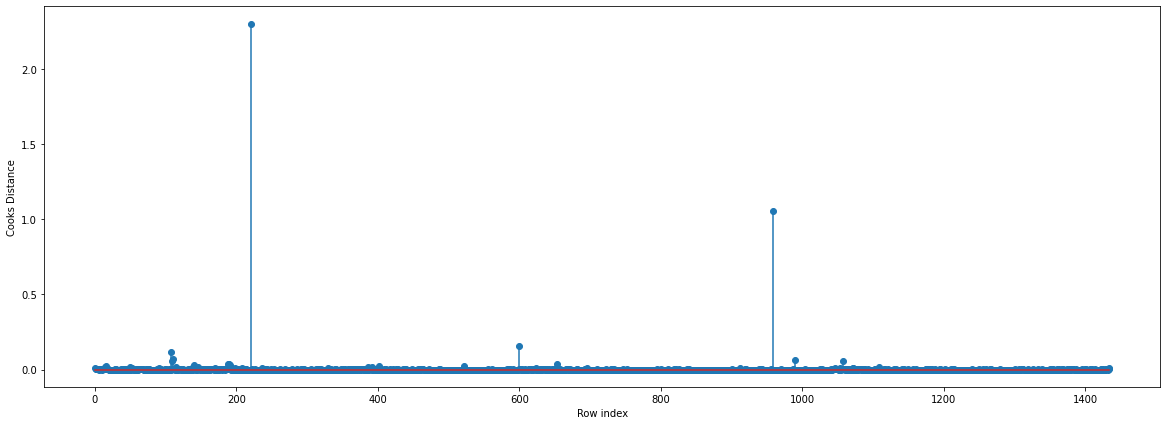

In [116]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new)),np.round(c_M,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [117]:
(np.argmax(c_M),np.max(c_M))

(220, 2.3034451664541025)

In [118]:
#Drop 220  observations
df_new_a=df_new.drop(df_new.index[[220]],axis=0)

In [119]:
df_new_a1=df_new_a.reset_index()

In [120]:
final_ml_b1= smf.ols('Price~age+KM+HP+cc+Gears+qur+Weight', data =df_new_a1).fit()

In [122]:
model_influence_b1 = final_ml_b1.get_influence()
(c_V, _) = model_influence_b1.cooks_distance

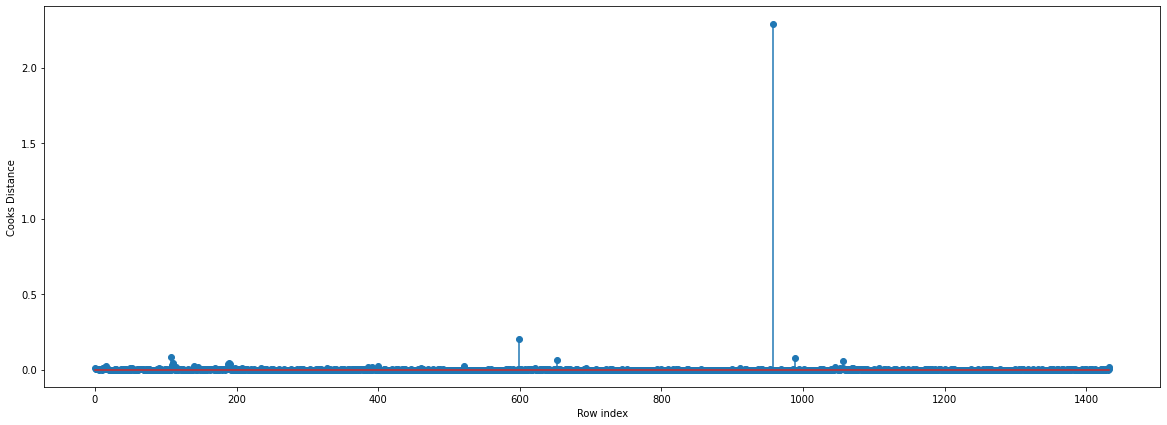

In [123]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new_a1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [124]:
(np.argmax(c_V),np.max(c_V))

(958, 2.2907159163045674)

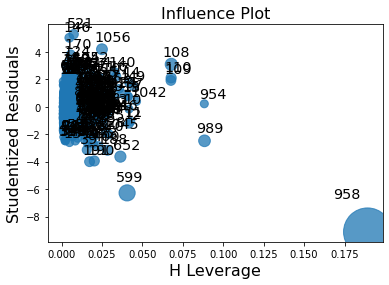

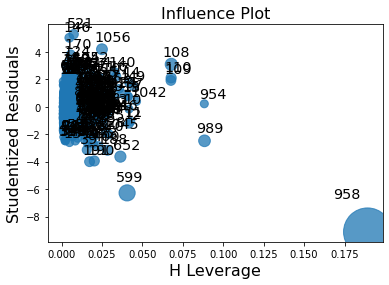

In [125]:
import statsmodels.api as sm
sm.graphics.influence_plot(final_ml_b1)

In [126]:
df_new_b=df_new_a.drop(df_new_a.index[[958]],axis=0)
df_new_b

,Price,age,KM,HP,cc,Doors,Cylinders,Gears,qur,Weight
0,13500,23,46986,90,2000,3,4,5,210,1165
1,13750,23,72937,90,2000,3,4,5,210,1165
2,13950,24,41711,90,2000,3,4,5,210,1165
3,14950,26,48000,90,2000,3,4,5,210,1165
4,13750,30,38500,90,2000,3,4,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,4,5,69,1025
1431,10845,72,19000,86,1300,3,4,5,69,1015
1432,8500,71,17016,86,1300,3,4,5,69,1015
1433,7250,70,16916,86,1300,3,4,5,69,1015


In [127]:
df_new_b1=df_new_b.reset_index()
final_ml_b2= smf.ols('Price~age+KM+HP+cc+Gears+qur+Weight', data =df_new_b1).fit()

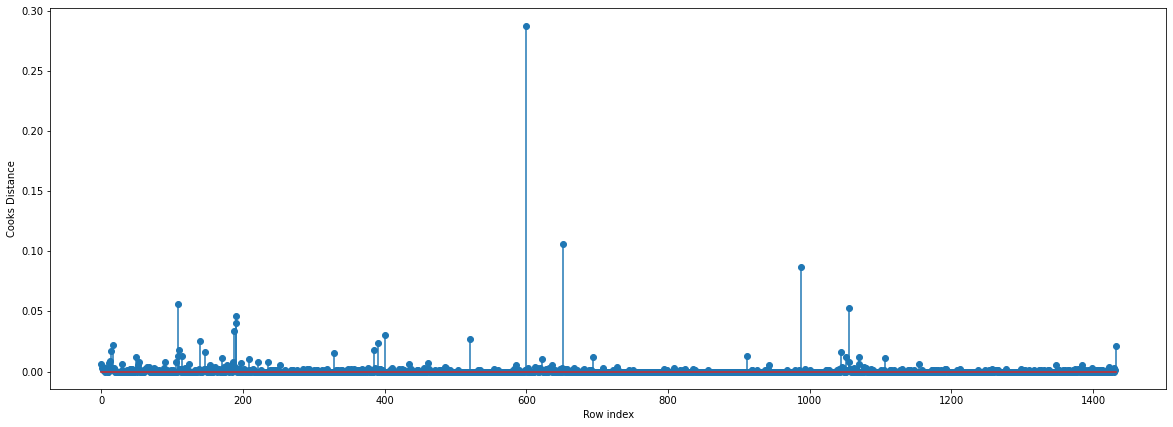

In [128]:
model_influence_b2 = final_ml_b2.get_influence()
(c_x, _) = model_influence_b2.cooks_distance
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new_b1)),np.round(c_x,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [129]:
(np.argmax(c_x),np.max(c_x))

(599, 0.287722936389568)

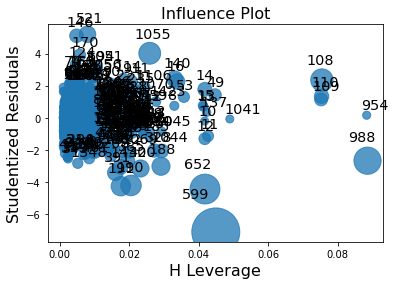

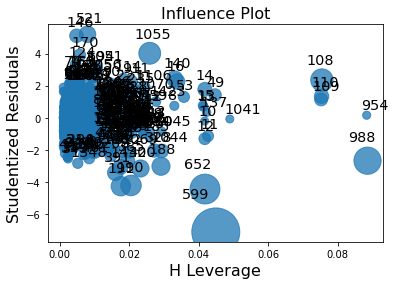

In [130]:
sm.graphics.influence_plot(final_ml_b2)

In [131]:
df_new_c=df_new_b1.drop(df_new_b1.index[[599,]],axis=0)
df_new_c

,index,Price,age,KM,HP,cc,Doors,Cylinders,Gears,qur,Weight
0,0,13500,23,46986,90,2000,3,4,5,210,1165
1,1,13750,23,72937,90,2000,3,4,5,210,1165
2,2,13950,24,41711,90,2000,3,4,5,210,1165
3,3,14950,26,48000,90,2000,3,4,5,210,1165
4,4,13750,30,38500,90,2000,3,4,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
1428,1430,7500,69,20544,86,1300,3,4,5,69,1025
1429,1431,10845,72,19000,86,1300,3,4,5,69,1015
1430,1432,8500,71,17016,86,1300,3,4,5,69,1015
1431,1433,7250,70,16916,86,1300,3,4,5,69,1015


In [132]:
df_new_c1=df_new_c.reset_index()
final_ml_c= smf.ols('Price~age+KM+HP+cc+Gears+qur+Weight', data =df_new_c1).fit()

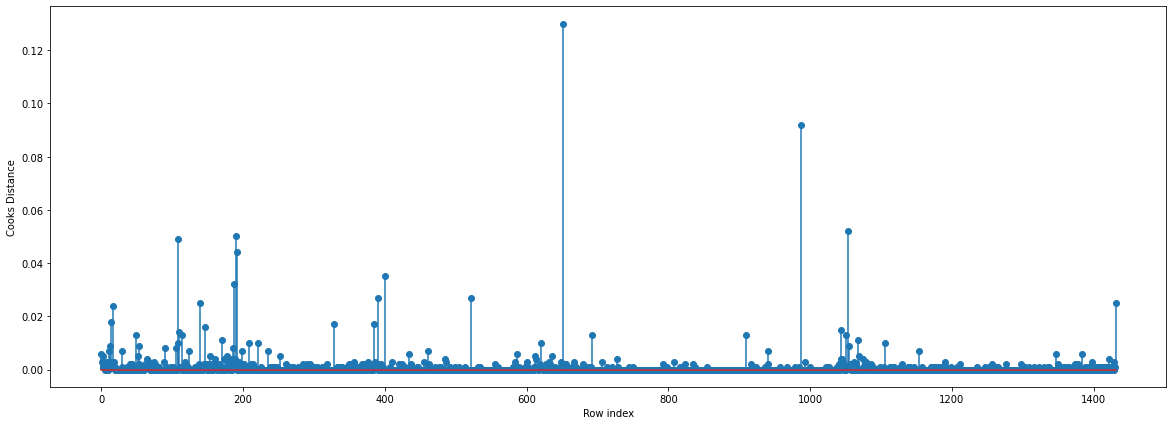

In [133]:
model_influence_c2= final_ml_c.get_influence()
(c_y, _) = model_influence_c2.cooks_distance
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new_c1)),np.round(c_y,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

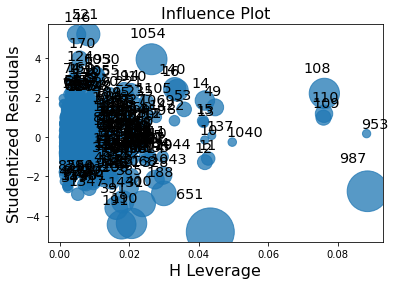

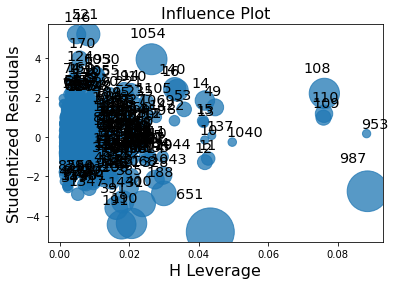

In [134]:
sm.graphics.influence_plot(final_ml_c)

In [135]:
(np.argmax(c_y),np.max(c_y))

(651, 0.129525265854554)

In [137]:
df_new_d=df_new_c1.drop(df_new_c1.index[[986]],axis=0)
df_new_d

,level_0,index,Price,age,KM,HP,cc,Doors,Cylinders,Gears,qur,Weight
0,0,0,13500,23,46986,90,2000,3,4,5,210,1165
1,1,1,13750,23,72937,90,2000,3,4,5,210,1165
2,2,2,13950,24,41711,90,2000,3,4,5,210,1165
3,3,3,14950,26,48000,90,2000,3,4,5,210,1165
4,4,4,13750,30,38500,90,2000,3,4,5,210,1170
...,...,...,...,...,...,...,...,...,...,...,...,...
1427,1428,1430,7500,69,20544,86,1300,3,4,5,69,1025
1428,1429,1431,10845,72,19000,86,1300,3,4,5,69,1015
1429,1430,1432,8500,71,17016,86,1300,3,4,5,69,1015
1430,1431,1433,7250,70,16916,86,1300,3,4,5,69,1015


In [138]:
df_new_d1=df_new_d.drop(['index','level_0'],axis=1)
df_new_d1

,Price,age,KM,HP,cc,Doors,Cylinders,Gears,qur,Weight
0,13500,23,46986,90,2000,3,4,5,210,1165
1,13750,23,72937,90,2000,3,4,5,210,1165
2,13950,24,41711,90,2000,3,4,5,210,1165
3,14950,26,48000,90,2000,3,4,5,210,1165
4,13750,30,38500,90,2000,3,4,5,210,1170
...,...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,4,5,69,1025
1428,10845,72,19000,86,1300,3,4,5,69,1015
1429,8500,71,17016,86,1300,3,4,5,69,1015
1430,7250,70,16916,86,1300,3,4,5,69,1015


In [139]:

final_ml_d= smf.ols('Price~age+KM+HP+cc+Gears+qur+Weight', data =df_new_d1).fit()

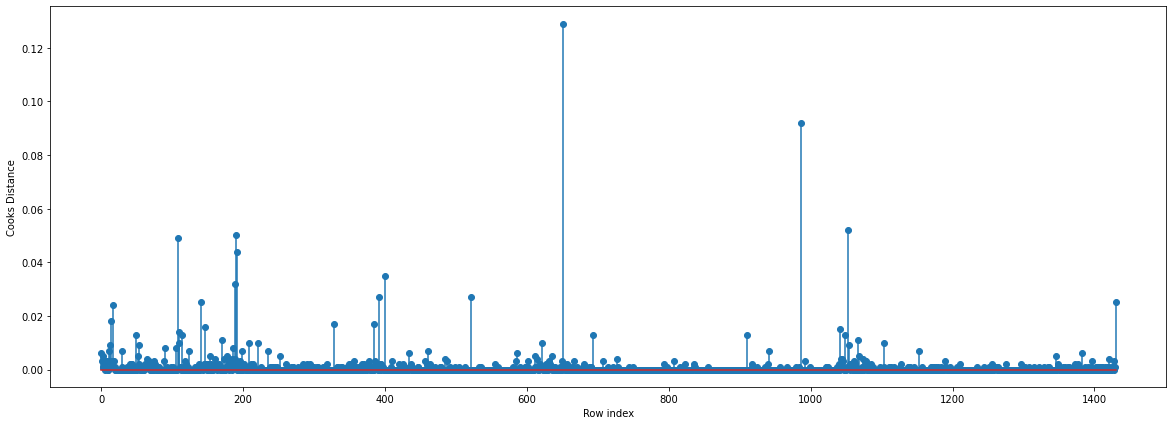

In [140]:
model_influence_d2= final_ml_d.get_influence()
(c_z, _) = model_influence_d2.cooks_distance
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df_new_d1)),np.round(c_z,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [141]:
(np.argmax(c_z),np.max(c_z))

(651, 0.12943396441359942)

# Since the value is <1 , we can stop the diagnostic process and finalize the model

In [143]:
import statsmodels.formula.api as smf
final_ml_d.predict(df_new_d1.iloc[0:5,])

0    16194.209308
1    15728.575175
2    16178.021731
3    15843.507424
4    15723.429433
dtype: float64

In [144]:
pred_A = final_ml_d.predict(df_new_d1)

In [145]:
pred_A

0       16194.209308
1       15728.575175
2       16178.021731
3       15843.507424
4       15723.429433
            ...     
1427     9054.309599
1428     8443.887383
1429     8590.321894
1430     8702.952130
1431    10905.924087
Length: 1431, dtype: float64

# R^2 value is 90% So Our Model is too sufficient and P value is also less than 0.05
# Here Doors variable coliniarity to the CC so ignore that as the input variable consider only independent variables except Doors as 
# Conclusion: if we want to Predict the Price for Toyoto the independent variables consideration"Age_08_04","KM","HP","cc","Gears", "Quarterly_Tax","Weight"
